In [1]:
import numpy as np
import pandas as pd
import json
from pprint import pprint
from dataclasses import asdict
import matplotlib.pyplot as plt

from martignac.workflows.solute_in_solvent_alchemical import project
from martignac.nomad.entries import get_entries_of_upload, get_entries_in_database
from martignac.nomad.uploads import get_specific_file_from_upload, get_upload_by_id

from martignac.workflow_interfaces.solute_generation import SoluteGenerationInterface
from martignac.workflow_interfaces.solvent_generation import SolventGenerationInterface
from martignac.workflow_interfaces.solute_in_solvent_generation import SoluteInSolventGenerationInterface
from martignac.workflow_interfaces.solute_in_solvent_alchemical import SoluteInSolventAlchemicalInterface
from martignac.workflow_interfaces.bilayer_generation import BilayerGenerationInterface
from martignac.workflow_interfaces.solute_in_bilayer_umbrella import SoluteInBilayerInterface

from martignac.nomad.utils import get_nomad_request

24-08-14 17:07:17 - pymbar.timeseries - WARNING - Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.
24-08-14 17:07:17 - pymbar.mbar_solvers - WARNING - 
********* JAX NOT FOUND *********
 PyMBAR can run faster with JAX  
 But will work fine without it   
Either install with pip or conda:
      pip install pybar[jax]     
               OR                
      conda install pymbar       
*********************************
24-08-14 17:07:17 - pymbar.mbar_solvers - INFO - JAX was either not detected or disabled, using standard NumPy and SciPy
24-08-14 17:07:18 - MDAnalysis.coordinates.AMBER - WARNING - netCDF4 is not available. Writing AMBER ncdf files will be slow.


In [14]:
entries = get_entries_in_database("HJdEI1q4SV-c5Di43BTT_Q", use_prod=False)
entries

[NomadEntry(entry_id='IWfLp8VCyT7z9t3BtVy21Q5WZSRW', upload_id='Hbwh9S0-RLehQIh90nfhAQ', references=[], origin='Tristan Bereau', n_quantities=0, nomad_version='1.2.2.dev365+g0c980916a', upload_create_time=datetime.datetime(2024, 2, 14, 9, 43, 58, 640000, tzinfo=datetime.timezone(datetime.timedelta(0), '+0000')), nomad_commit='', processing_errors=['Error creating MDAnalysis universe.', 'Error creating MDAnalysis universe.', 'Error creating MDAnalysis universe.', 'Error parsing interactions.', 'Error creating MDAnalysis universe.', 'Error creating MDAnalysis universe.', 'Error creating MDAnalysis universe.', 'Error creating MDAnalysis universe.', 'Error creating MDAnalysis universe.', 'Error creating MDAnalysis universe.', 'Error creating MDAnalysis universe.'], last_processing_time=datetime.datetime(2024, 2, 14, 9, 43, 59, 911000, tzinfo=datetime.timezone(datetime.timedelta(0), '+0000')), parser_name='parsers/gromacs', calc_id='IWfLp8VCyT7z9t3BtVy21Q5WZSRW', published=True, writers=[No

In [15]:
upload_id = 'Ma3E_elDQuK98RBaDbYM_A'
# job_id = "a2ad31a1658772eaefad79a864db51a9"
# file_name = "signac_job_document.json"
# response = get_specific_file_from_upload(upload_id, f"{job_id}/{file_name}", use_prod=False, with_authentication=True)

In [16]:
interface = SoluteInSolventAlchemicalInterface.from_upload(upload_id, find_first_job_id=True)
interface

24-08-14 17:09:34 - martignac.nomad.uploads - INFO - downloading file d64faa3ed70ea0379fb56f746fb8c93d/signac_job_document.json from upload Ma3E_elDQuK98RBaDbYM_A on test server
24-08-14 17:09:34 - martignac.nomad.utils - INFO - Sending get request @ https://nomad-lab.eu/prod/v1/test/api/v1/uploads/Ma3E_elDQuK98RBaDbYM_A/raw/d64faa3ed70ea0379fb56f746fb8c93d/signac_job_document.json


SoluteInSolventAlchemicalInterface(fetched_nomad=True, files_symlinked=True, gromacs_logs={'production': 'solute_in_solvent_alchemical_production-2.log'}, itp_files='15259a565eb93668e9e40eb8cfd10f9b', mdp_files='89b51ecb08ca7fb84bfa3118d1ede5b6', nomad_upload_id='', nomad_workflow='solute_in_solvent_alchemical.archive.yaml', ready_for_nomad_upload=False, tasks={'compute_free_energy': 'run'}, upload_id='Ma3E_elDQuK98RBaDbYM_A', use_prod=False, with_authentication=True, alchemical_log='solute_in_solvent_alchemical_production-2.log', alchemical_xvg='solute_in_solvent_alchemical_production-2.xvg', _free_energy={'mean': -4.078107592274145, 'std': 0.09085059659645506}, num_lambda_points=3, system_prepared=True, workflows={'prepare_system': 'SoluteInSolventGenFlow'})

In [19]:
interface.free_energy

FreeEnergy(mean=-4.078107592274145, std=0.09085059659645506)

In [20]:
pd.json_normalize(asdict(SoluteInSolventAlchemicalInterface.from_upload(upload_id, find_first_job_id=True)))

24-08-14 17:09:41 - martignac.nomad.uploads - INFO - downloading file d64faa3ed70ea0379fb56f746fb8c93d/signac_job_document.json from upload Ma3E_elDQuK98RBaDbYM_A on test server
24-08-14 17:09:41 - martignac.nomad.utils - INFO - Sending get request @ https://nomad-lab.eu/prod/v1/test/api/v1/uploads/Ma3E_elDQuK98RBaDbYM_A/raw/d64faa3ed70ea0379fb56f746fb8c93d/signac_job_document.json


,fetched_nomad,files_symlinked,itp_files,mdp_files,nomad_upload_id,nomad_workflow,ready_for_nomad_upload,upload_id,use_prod,with_authentication,alchemical_log,alchemical_xvg,num_lambda_points,system_prepared,gromacs_logs.production,tasks.compute_free_energy,_free_energy.mean,_free_energy.std,workflows.prepare_system
0,True,True,15259a565eb93668e9e40eb8cfd10f9b,89b51ecb08ca7fb84bfa3118d1ede5b6,,solute_in_solvent_alchemical.archive.yaml,False,Ma3E_elDQuK98RBaDbYM_A,False,True,solute_in_solvent_alchemical_production-2.log,solute_in_solvent_alchemical_production-2.xvg,3,True,solute_in_solvent_alchemical_production-2.log,run,-4.078108,0.090851,SoluteInSolventGenFlow


In [21]:
SoluteInSolventGenerationInterface.from_upload("r5ioYKfbTw2iCFy8_qi-Ig")

24-08-14 17:09:41 - martignac.nomad.uploads - INFO - downloading file signac_job_document.json from upload r5ioYKfbTw2iCFy8_qi-Ig on test server
24-08-14 17:09:41 - martignac.nomad.utils - INFO - Sending get request @ https://nomad-lab.eu/prod/v1/test/api/v1/uploads/r5ioYKfbTw2iCFy8_qi-Ig/raw/signac_job_document.json


SoluteInSolventGenerationInterface(fetched_nomad=True, files_symlinked=True, gromacs_logs={'minimize': 'solute_in_solvent_minimize.log', 'equilibrate': 'solute_in_solvent_equilibrate.log'}, itp_files='15259a565eb93668e9e40eb8cfd10f9b', mdp_files='20b07a164f9519df9622051af672c209', nomad_upload_id='', nomad_workflow='full_workflow.solute_in_solvent_generation.archive.yaml', ready_for_nomad_upload=True, tasks={'solvate': 'run'}, upload_id='r5ioYKfbTw2iCFy8_qi-Ig', use_prod=False, with_authentication=True, solute_solvent_gro='solute_in_solvent_equilibrate.gro', solute_solvent_top='solute_in_solvent.top', workflows={'generate_solute': 'SoluteGenFlow', 'generate_solvent': 'SolventGenFlow'})

In [22]:
BilayerGenerationInterface.from_upload("vAi5DXTVT-yU6cTNOB9O_g")

24-08-14 17:09:42 - martignac.nomad.uploads - INFO - downloading file signac_job_document.json from upload vAi5DXTVT-yU6cTNOB9O_g on test server
24-08-14 17:09:42 - martignac.nomad.utils - INFO - Sending get request @ https://nomad-lab.eu/prod/v1/test/api/v1/uploads/vAi5DXTVT-yU6cTNOB9O_g/raw/signac_job_document.json


BilayerGenerationInterface(fetched_nomad=True, files_symlinked=True, gromacs_logs={'minimize': 'bilayer_minimize.log', 'equilibrate': 'bilayer_equilibrate.log', 'production': 'bilayer_production.log'}, itp_files='f75fb22561a042c4c3a3d0374cf88dd4', mdp_files='71f9c4bba1e661b14a4df7f97283b60c', nomad_upload_id='', nomad_workflow='bilayer_generation.archive.yaml', ready_for_nomad_upload=True, tasks={'generate_initial_bilayer': 'run'}, upload_id='vAi5DXTVT-yU6cTNOB9O_g', use_prod=False, with_authentication=True, lipid_names=['POPC'], bilayer_gro='bilayer_production.gro', bilayer_top='bilayer.top')

In [23]:
upload_id = "h4Mdu3IiT4u9M9GcJbPD-g"
interface = SoluteInBilayerInterface.from_upload(upload_id, find_first_job_id=True)
interface

24-08-14 17:09:42 - martignac.nomad.uploads - INFO - downloading file fff2e4663a4600f9aee8cdc958056107/signac_job_document.json from upload h4Mdu3IiT4u9M9GcJbPD-g on test server
24-08-14 17:09:42 - martignac.nomad.utils - INFO - Sending get request @ https://nomad-lab.eu/prod/v1/test/api/v1/uploads/h4Mdu3IiT4u9M9GcJbPD-g/raw/fff2e4663a4600f9aee8cdc958056107/signac_job_document.json


SoluteInBilayerInterface(fetched_nomad=True, files_symlinked=True, gromacs_logs={'minimize': 'solute_in_bilayer_minimize-1.05.log', 'equilibrate': 'solute_in_bilayer_equilibrate-1.05.log', 'production': 'solute_in_bilayer_production-1.05.log'}, itp_files='f75fb22561a042c4c3a3d0374cf88dd4', mdp_files='c007793be3151fc54f36966a50ac59d8', nomad_upload_id='', nomad_workflow='solute_in_bilayer.archive.yaml', ready_for_nomad_upload=True, tasks={'insert_solute_in_box': 'run', 'convert_box_to_gro': 'run', 'update_topology_file': 'run', 'compute_wham': 'run', 'analyze_wham': 'run'}, upload_id='h4Mdu3IiT4u9M9GcJbPD-g', use_prod=False, with_authentication=True, umbrella_pullx_xvg='solute_in_bilayer_production-1.05_pullx.xvg', umbrella_pullf_xvg='solute_in_bilayer_production-1.05_pullf.xvg', umbrella_log='solute_in_bilayer_production-1.05.log', free_energy={'job_id': '201a562a50f3eb0f0021158c37d1eeab', 'profile': 'wham_profile.npy', 'hist': 'wham_hist.npy', 'bootstrap': 'wham_bstrap.npy'}, bilayer_

24-08-14 17:09:42 - martignac.nomad.uploads - INFO - downloading file 201a562a50f3eb0f0021158c37d1eeab/wham_bstrap.npy from upload h4Mdu3IiT4u9M9GcJbPD-g on test server
24-08-14 17:09:43 - martignac.nomad.utils - INFO - Sending get request @ https://nomad-lab.eu/prod/v1/test/api/v1/uploads/h4Mdu3IiT4u9M9GcJbPD-g/raw/201a562a50f3eb0f0021158c37d1eeab/wham_bstrap.npy


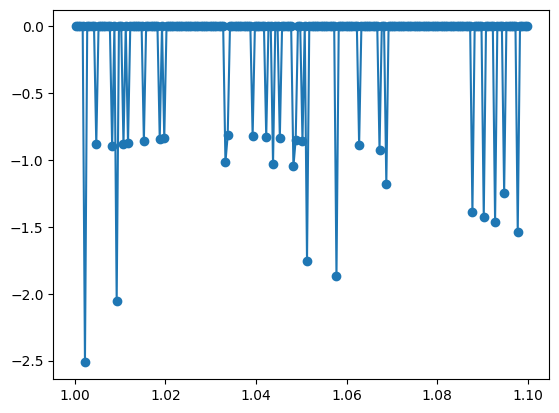

In [24]:
wham_pmf = interface.get_wham_npy()
plt.plot(wham_pmf[0], wham_pmf[1], "o-");